## Polynomial Regression -cross validation with sklearn

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [42]:
auto = pd.read_csv('Auto.csv')
auto[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [43]:
# Select predictor and response

In [44]:
hp = auto.horsepower
mpg = auto.mpg

In [45]:
# predictors must be an array or DataFrame (for sklearn)

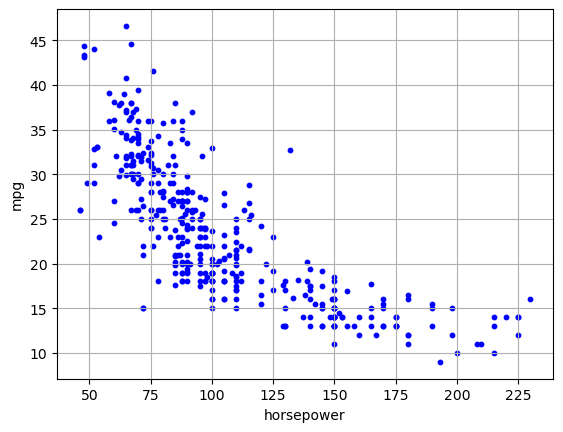

In [46]:
plt.scatter(hp,mpg,c='b',s=10)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.grid()

In [47]:
# predictors must be an array or dataframe 
# (not vector or series)
hp.shape

(392,)

In [48]:
hp1 = hp.values.reshape(-1,1)
hp1.shape

(392, 1)

In [49]:
hp1[:5]

array([[130],
       [165],
       [150],
       [150],
       [140]])

In [50]:
# linear regression

In [51]:
model1 = LinearRegression().fit(hp1,mpg)
yhat   = model1.predict(hp1)

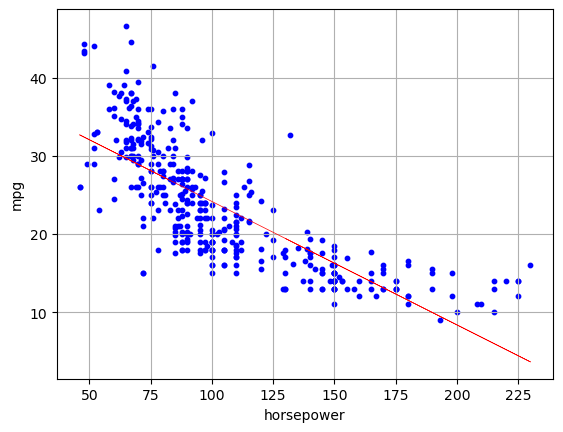

In [52]:
plt.scatter(hp,mpg,c='b',s=10)
plt.plot(hp,yhat,c='r',lw=0.5)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.grid()

### degree-two regression

In [53]:
# add columns to predictor's matrix

In [54]:
poly2 = PolynomialFeatures(degree=2)
hp2 = poly2.fit_transform(hp1)
hp2[:5]

array([[1.0000e+00, 1.3000e+02, 1.6900e+04],
       [1.0000e+00, 1.6500e+02, 2.7225e+04],
       [1.0000e+00, 1.5000e+02, 2.2500e+04],
       [1.0000e+00, 1.5000e+02, 2.2500e+04],
       [1.0000e+00, 1.4000e+02, 1.9600e+04]])

In [55]:
# hp2 is array (no need to reshape)

In [56]:
df2 = pd.DataFrame(hp2)
df2[:5]

,0,1,2
0,1.0,130.0,16900.0
1,1.0,165.0,27225.0
2,1.0,150.0,22500.0
3,1.0,150.0,22500.0
4,1.0,140.0,19600.0


In [57]:
hp[:5]

0    130
1    165
2    150
3    150
4    140
Name: horsepower, dtype: int64

In [58]:
# Degree-2 regression model

In [59]:
model2 = LinearRegression().fit(hp2,mpg)
yhat2 = model2.predict(hp2)

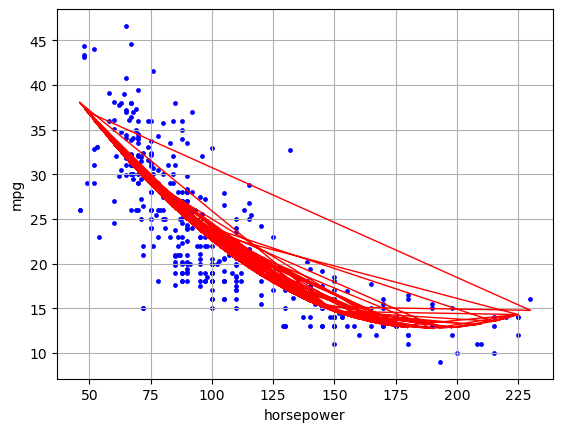

In [60]:
plt.scatter(hp,mpg,c='b',s=6)
plt.plot(hp,yhat2,c='r',lw=1)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.grid()

In [61]:
# need to sort dataset -by horsepower

In [62]:
d2 = auto.sort_values('horsepower')
d2[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
19,26.0,4,97.0,46,1835,20.5,70,2,volkswagen 1131 deluxe sedan
101,26.0,4,97.0,46,1950,21.0,73,2,volkswagen super beetle
324,43.4,4,90.0,48,2335,23.7,80,2,vw dasher (diesel)
323,44.3,4,90.0,48,2085,21.7,80,2,vw rabbit c (diesel)
242,43.1,4,90.0,48,1985,21.5,78,2,volkswagen rabbit custom diesel


In [63]:
mpg = d2.mpg
hp = d2.horsepower

In [64]:
# poly2.fit_transform() requires hp to be an array
hp1 = hp.values.reshape(-1,1)

In [65]:
poly2 = PolynomialFeatures(degree=2)
hp2 = poly2.fit_transform(hp1)

In [66]:
model2 = LinearRegression().fit(hp2,mpg)
yhat2 = model2.predict(hp2)

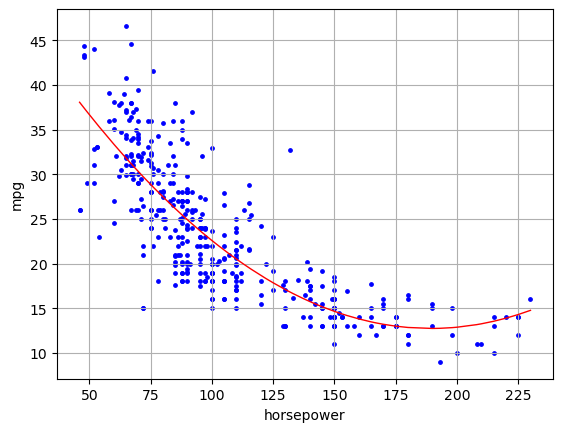

In [67]:
plt.scatter(hp,mpg,c='b',s=6)
plt.plot(hp,yhat2,c='r',lw=1)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.grid()

In [68]:
# degree-five regression model

In [69]:
poly5 = PolynomialFeatures(degree=5)
hp5 = poly5.fit_transform(hp1)
hp5.shape

(392, 6)

In [70]:
df5 = pd.DataFrame(hp5)
df5[:5]

,0,1,2,3,4,5
0,1.0,46.0,2116.0,97336.0,4477456.0,205962976.0
1,1.0,46.0,2116.0,97336.0,4477456.0,205962976.0
2,1.0,48.0,2304.0,110592.0,5308416.0,254803968.0
3,1.0,48.0,2304.0,110592.0,5308416.0,254803968.0
4,1.0,48.0,2304.0,110592.0,5308416.0,254803968.0


In [71]:
model5 = LinearRegression().fit(hp5,mpg)
yhat5 = model5.predict(hp5)

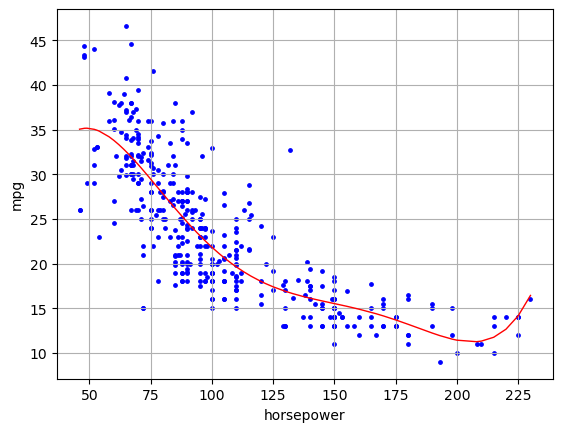

In [72]:
plt.scatter(hp,mpg,c='b',s=6)
plt.plot(hp,yhat5,c='r',lw=1)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.grid()

### Fit many polynomials

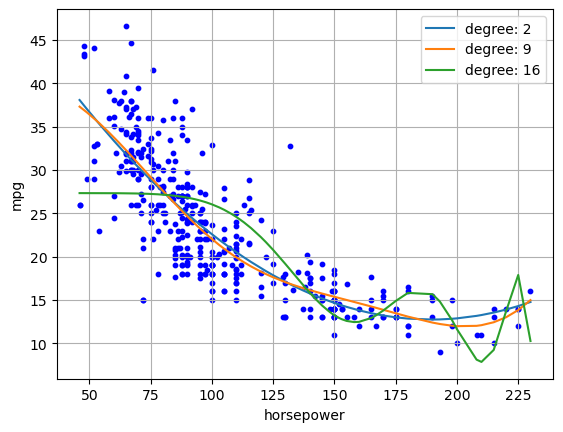

In [73]:
plt.scatter(hp,mpg,color='b',s = 10)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.grid()

for j in range(2,19,7):
    hp_j = PolynomialFeatures(degree = j).\
                    fit_transform(hp1)
    model = LinearRegression().fit(hp_j,mpg)
    yhat = model.predict(hp_j)
    plt.plot(hp,yhat,label = 'degree: '+str(j))
    plt.legend()

### Fit two polynomials

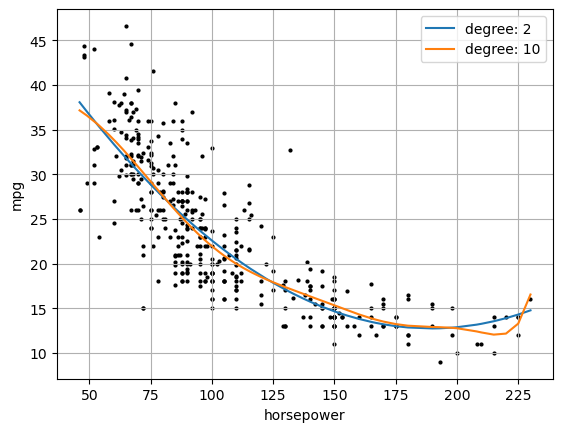

In [74]:
# plt.figure(figsize=(9,9))
plt.scatter(hp,mpg,color='k',s = 4)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.grid()

for j in range(2,11,8):
    hp_j = PolynomialFeatures(degree = j).\
                    fit_transform(hp1)
    model = LinearRegression().fit(hp_j,mpg)
    yhat = model.predict(hp_j)
    plt.plot(hp,yhat,label = 'degree: '+str(j))
    plt.legend()

## Validation set approach

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
list1 = ['horsepower','mpg']
df = auto[list1]
df[:5]

,horsepower,mpg
0,130,18.0
1,165,15.0
2,150,18.0
3,150,16.0
4,140,17.0


In [77]:
mpg = df.mpg
hp1 = df.drop(['mpg'],axis = 1)
hp1[:5]

,horsepower
0,130
1,165
2,150
3,150
4,140


In [78]:
mpg[:5]

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [79]:
hp_train,hp_test,mpg_train,mpg_test = train_test_split(hp1,mpg,
                                                       test_size=0.5,
                                                       random_state=1)

### degree 2

In [80]:
form = PolynomialFeatures(degree=2)
hp_train_2 = form.fit_transform(hp_train)
hp_test_2 = form.fit_transform(hp_test)

In [81]:
m2 = LinearRegression().fit(hp_train_2,mpg_train)
yhat2 = m2.predict(hp_test_2)

In [82]:
# mspe
res2 = (yhat2 - mpg_test)**2
mspe2 = np.mean(res2)
mspe2

18.848292603275368

### degree 5

In [83]:
form = PolynomialFeatures(degree=5)
hp_train_5 = form.fit_transform(hp_train)
hp_test_5 = form.fit_transform(hp_test)

In [84]:
m5 = LinearRegression().fit(hp_train_5,mpg_train)
yhat5 = m5.predict(hp_test_5)

In [85]:
res5 = (yhat5 - mpg_test)**2
mspe5 = np.mean(res5)
mspe5

18.32414405394103

### All degrees

In [88]:
mspe = []
for i in range(1,15):
    form = PolynomialFeatures(degree=i)
    hp_train_i = form.fit_transform(hp_train)
    hp_test_i = form.fit_transform(hp_test)
    model = LinearRegression().fit(hp_train_i,mpg_train)
    yhat_i = model.predict(hp_test_i)
    sqres = (yhat_i - mpg_test)**2
    mspe_i = np.mean(sqres)
    mspe.append(mspe_i)

In [90]:
mspe.insert(0,np.nan)
mspe

[nan,
 nan,
 24.80212062059357,
 18.848292603275368,
 18.805111358663957,
 18.711722273937095,
 18.32414405394103,
 18.25928574750287,
 18.293107194573608,
 18.415015667962784,
 18.46485197825989,
 18.37059243930088,
 18.37994703383652,
 22.595691312886352,
 25.260683186952914,
 28.071749850764373]

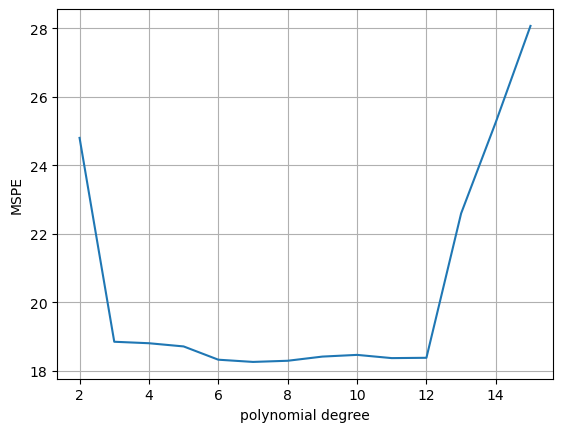

In [91]:
plt.plot(mspe)
plt.xlabel('polynomial degree')
plt.ylabel('MSPE')
plt.grid()

Best model is degree 6

# Cross-Validation

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

In [93]:
## Leave-One-Out Cross-Validation (LOOCV)

In [94]:
measure = 'neg_mean_squared_error'

Linear regression

In [95]:
mspe1 = cross_val_score(LinearRegression(),hp1,mpg,
                        cv = LeaveOneOut(),scoring = measure)
cvmspe1 = mspe1.mean()
-cvmspe1

24.231513517929233

Quadratic model

In [96]:
form_2 = PolynomialFeatures(degree = 2)
hp2 = form_2.fit_transform(hp1)

In [97]:
mspe2 = cross_val_score(LinearRegression(),hp2,mpg,
                        cv = LeaveOneOut(),scoring = measure)
cvmspe2 = mspe2.mean()
-cvmspe2

19.24821312448955

### All degrees 

In [98]:
model = LinearRegression()

In [99]:
cvmspe = [-cvmspe1]

for i in range(2,14):
    form = PolynomialFeatures(degree = i)
    hp_i = form.fit_transform(hp1)
    mspe = cross_val_score(model,hp_i,mpg,
                           cv = LeaveOneOut(),
                           scoring = measure)
    cvmspe.append(-mspe.mean())

In [100]:
cvmspe.insert(0,np.nan)
cvmspe

[nan,
 24.231513517929233,
 19.24821312448955,
 19.33498406408833,
 19.424430307335353,
 19.03320629117349,
 18.970104720463834,
 19.125909161806504,
 19.224227217441562,
 19.133860700424858,
 18.946774562421172,
 19.12512650671817,
 24.14841886771242,
 27.763422472186058]

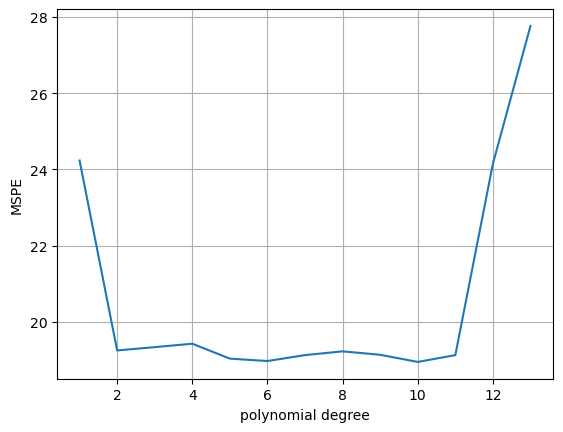

In [101]:
plt.plot(cvmspe)
plt.xlabel('polynomial degree')
plt.ylabel('MSPE')
plt.grid()

LOOCV best model is polynomial degree 6

## K-fold Cross validation

In [102]:
from sklearn.model_selection import KFold

In [103]:
# 5-fold cross validation

### linear model

In [104]:
mspe1 = cross_val_score(LinearRegression(),hp1,mpg,
                        cv = KFold(n_splits = 5),
                        scoring = measure)

In [105]:
cvmspe1 = mspe1.mean()
-cvmspe1

31.447014088557516

### Quadratic model

In [106]:
form_2 = PolynomialFeatures(degree = 2)
hp_2 = form_2.fit_transform(hp1)

In [107]:
mspe2 = cross_val_score(LinearRegression(),hp_2,mpg,
                        cv = KFold(n_splits = 5),
                        scoring = measure)
cvmspe2 = mspe2.mean()
-cvmspe2

24.3471588436745

### All degrees

In [108]:
cvmspe = [-cvmspe1]
for i in range(2,14):
    form = PolynomialFeatures(degree = i)
    hp_i = form.fit_transform(hp1)
    mspe = cross_val_score(LinearRegression(),
                           hp_i,mpg,
                           cv = KFold(n_splits = 5),
                           scoring = measure)
    cvmspe.append(-mspe.mean())

In [109]:
cvmspe.insert(0,np.nan)
cvmspe

[nan,
 31.447014088557516,
 24.3471588436745,
 24.3460780787725,
 24.355389653434617,
 23.573275925295462,
 23.37750240479867,
 23.6468995329141,
 23.892279395504783,
 23.918287153034463,
 23.862570430310583,
 24.331226725898325,
 30.101687264157114,
 34.501048193650135]

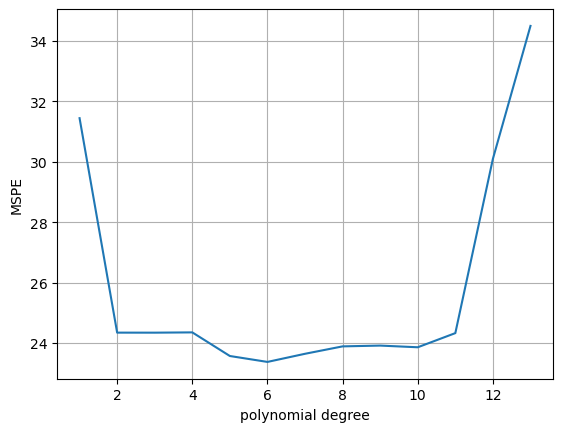

In [110]:
plt.plot(cvmspe)
plt.xlabel('polynomial degree')
plt.ylabel('MSPE')
plt.grid()

5-fold best model is degree 6